In [3]:
import os
import zipfile
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing import image
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [7]:
data_path="dogscats/"

In [8]:
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test1")
valid_dir = os.path.join(data_path, "valid")

In [9]:
len(glob(train_dir+'/dogs/*'))

11500

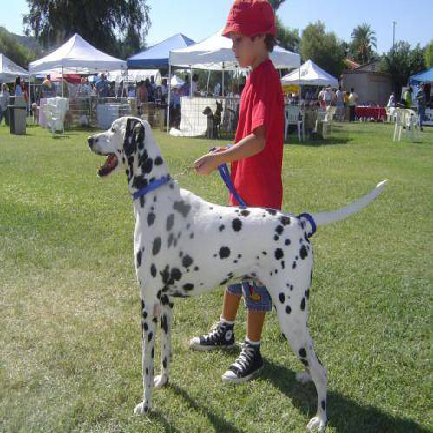

In [11]:
dir="dogscats/train/dogs/dog.10004.jpg"
img = image.load_img(dir,target_size=(433,433))
img

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (433, 433),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_dir,
                                            target_size = (433, 433),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
IMG_SHAPE=(433, 433, 3)
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

41402368/58889256 [====================>.........] - ETA: 3s

In [13]:
base_model.trainable = False


In [14]:
for (i, layer) in enumerate(base_model.layers):
  print(str(i) +" " + layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [15]:
x = Flatten()(base_model.output)
prediction = Dense(2, activation='softmax')(x)

In [16]:
model = Model(inputs=base_model.input, outputs=prediction)

In [17]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [18]:
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy')
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2)


In [ ]:
batch_size = 32
hist=model.fit(training_set, epochs=5,
               validation_data=test_set,
               batch_size=batch_size,
               callbacks=[mcp_save,earlyStopping])

Epoch 1/5
719/719 [==============================] - 1240s 2s/step - loss: 0.4292 - accuracy: 0.8721 - val_loss: 0.3420 - val_accuracy: 0.9085
Epoch 2/5
719/719 [==============================] - 1203s 2s/step - loss: 0.3596 - accuracy: 0.9096 - val_loss: 0.4243 - val_accuracy: 0.9035
Epoch 3/5
719/719 [==============================] - 1195s 2s/step - loss: 0.3432 - accuracy: 0.9220 - val_loss: 0.3652 - val_accuracy: 0.9330
Epoch 4/5
719/719 [==============================] - 1207s 2s/step - loss: 0.3337 - accuracy: 0.9264 - val_loss: 0.4280 - val_accuracy: 0.9215
Epoch 5/5
719/719 [==============================] - 1195s 2s/step - loss: 0.3297 - accuracy: 0.9318 - val_loss: 0.4429 - val_accuracy: 0.9305
